In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import sparse

import pickle

from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

In [2]:
from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

In [3]:
from recommender import plot_cm, print_results, IO
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise

In [4]:
%%time
# Load data

fig_dir = 'figs/modeling/Pittsburgh/'

data_dir = 'data/Pittsburgh/'
dfb = pd.read_pickle(data_dir + 'business.pkl')
dfr = pd.read_pickle(data_dir + 'review.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')
datar = pd.read_pickle(data_dir + 'data_review.pkl')

Wall time: 283 ms


In [5]:
print(dfb.shape)
print(dfu.shape)
print(datar.shape)

del dfb
del dfu
del dfr

datar.head()

(4745, 93)
(46179, 22)
(143682, 3)


,user_id,business_id,stars
0,39,3,1
1,40,3,1
2,41,3,3
3,42,3,5
4,43,3,1


In [6]:
# Split the dataset into a training set a test set

X_train, X_test, y_train, y_test = train_test_split(datar[['user_id', 'business_id']].values, datar['stars'].values, \
                                                   test_size=0.4, random_state=0)

In [7]:
models = [ModeClassifier(), RS_surprise(NormalPredictor()), BaselineMean(), BaselineRegression(), \
          RS_surprise(BaselineOnly()), RS_surprise(KNNBasic()), RS_surprise(KNNWithMeans()), RS_surprise(KNNBaseline()), \
          ALS1(), ALS2(), RS_surprise(SVD()), RS_surprise(SVDpp()), RS_surprise(NMF()), RS_surprise(SlopeOne()), \
          RS_surprise(CoClustering())]
model_names = ['Mode estimator', 'Normal predictor*', 'Baseline (mean)', 'Baseline (regression)', \
              'Baseline (ALS)*', 'KNN (basic)*', 'KNN (with means)*', 'KNN (baseline)*', \
              'SVD-ALS1', 'SVD-ALS2', 'SVD-SGD*', 'SVD++-SGD*', 'NMF-SGD*', 'Slope one*', 'Co-clustering*']
test = [True, True, True, True, \
       True, False, False, False, \
       True, True, True, True, True, True, True]
fignames = [fig_dir + str(i) + 'cm.png' for i in range(len(models))]

In [8]:
%%time

estimators = []
is_successful = []

for i, model in enumerate(models):
    try:
        print(model_names[i] + '...')
        if not test[i]:
            print('Estimator not tested')
            estimators.append(model)
            is_successful.append(False)
            print()
            continue
        model.fit(X_train, y_train)
        estimators.append(model)
        print(model_names[i] + ' successful.')
        is_successful.append(True)
        print()
    except:
        traceback.print_exc()
        print(model_names[i] + ' failed.')
        is_successful.append(False)
        print()

try:
    IO(data_dir + 'results/estimators.pkl').to_pickle(estimators)
    print('Saving to pickle successful.')
except:
    traceback.print_exc()
    print('Saving to pickle failed')

IO(data_dir + 'results/is_successful.pkl').to_pickle(is_successful)

Mode estimator...
Mode estimator successful.

Normal predictor*...
Normal predictor* successful.

Baseline (mean)...
Baseline (mean) successful.

Baseline (regression)...
Baseline (regression) successful.

Baseline (ALS)*...
Estimating biases using als...
Baseline (ALS)* successful.

KNN (basic)*...
Estimator not tested

KNN (with means)*...
Estimator not tested

KNN (baseline)*...
Estimator not tested

SVD-ALS1...
SVD-ALS1 successful.

SVD-ALS2...
SVD-ALS2 successful.

SVD-SGD*...
SVD-SGD* successful.

SVD++-SGD*...
SVD++-SGD* successful.

NMF-SGD*...
NMF-SGD* successful.

Slope one*...
Slope one* successful.

Co-clustering*...
Co-clustering* successful.

Saving to pickle successful.
Wall time: 5min 41s


Mode estimator
Fitting time: 0.0 s.
RMSE on training set: 1.8025978796275053.
RMSE on test set: 1.8033534282207884.
r2 on training set: -0.8466170815717637.
r2 on test set: -0.844090449961989.
Classification accuracy on training set: 0.39645512649491355.
Classification accuracy on test set: 0.397577993144607.


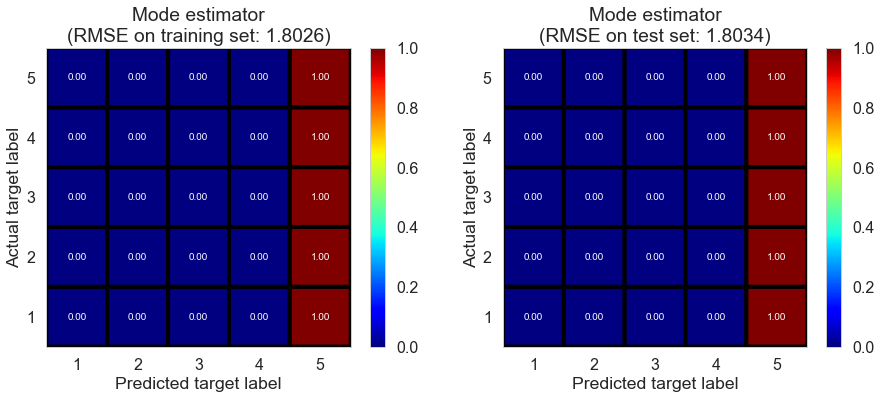


Normal predictor*
Fitting time: 0.40120410919189453 s.
RMSE on training set: 1.7296085727234407.
RMSE on test set: 1.7283475026854096.
r2 on training set: -0.6955275296416641.
r2 on test set: -0.7096854791796758.
Classification accuracy on training set: 0.24393044809706643.
Classification accuracy on test set: 0.2448454056687488.


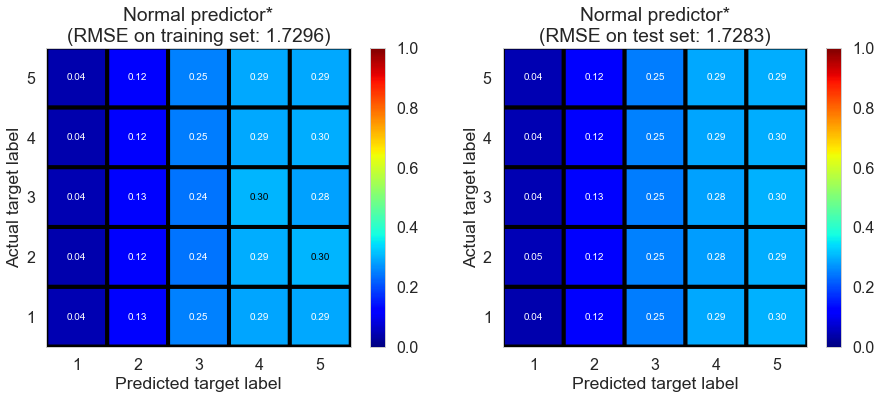


Baseline (mean)
Fitting time: 0.09360003471374512 s.
RMSE on training set: 0.9052065816970079.
RMSE on test set: 1.3274467347546197.
r2 on training set: 0.5343339858452893.
r2 on test set: 0.0007947061041378989.
Classification accuracy on training set: 0.5688965189249382.
Classification accuracy on test set: 0.3622396603622571.


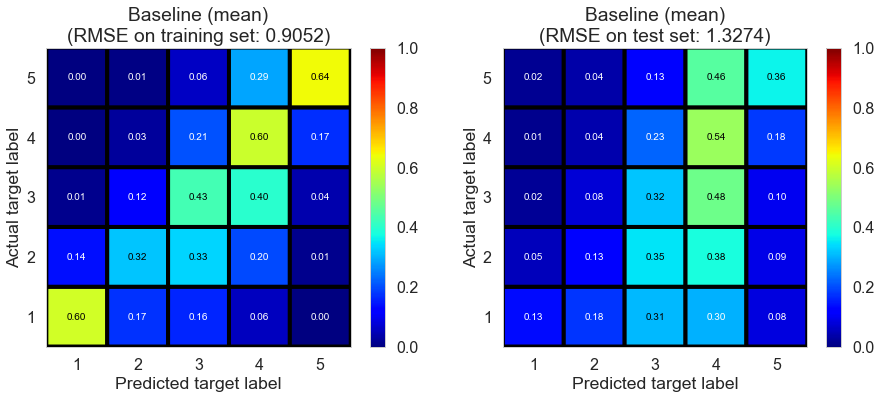


Baseline (regression)
Fitting time: 0.27720117568969727 s.
RMSE on training set: 0.8443567345743602.
RMSE on test set: 1.2091786625215442.
r2 on training set: 0.5948357853934625.
r2 on test set: 0.17091039705531674.
Classification accuracy on training set: 0.4695913419712559.
Classification accuracy on test set: 0.3373410123014285.


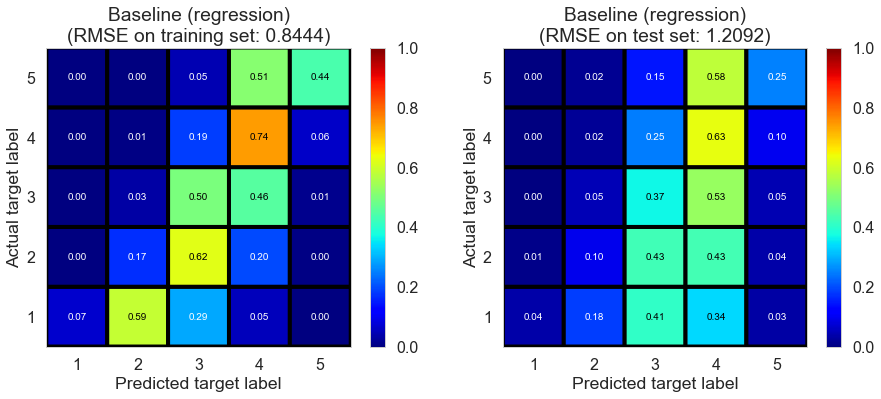


Baseline (ALS)*
Fitting time: 0.4938039779663086 s.
RMSE on training set: 1.1119210869575407.
RMSE on test set: 1.205637980902595.
r2 on training set: 0.297369383729819.
r2 on test set: 0.17575872017555239.
Classification accuracy on training set: 0.31485111763272977.
Classification accuracy on test set: 0.29250256642249406.


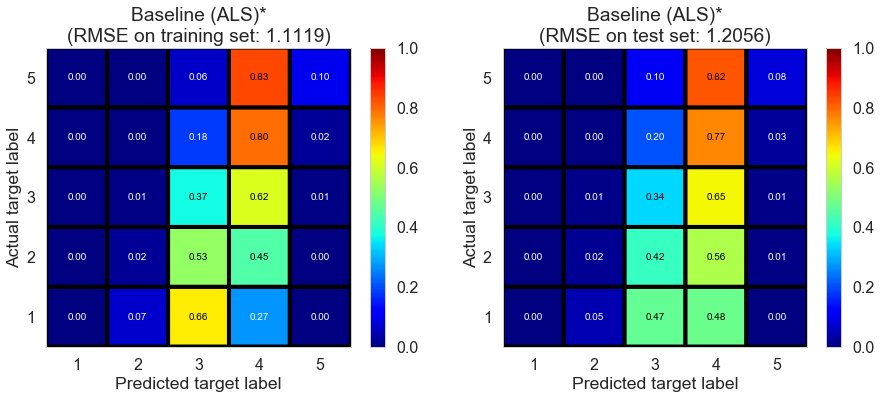


SVD-ALS1
Fitting time: 130.4022455215454 s.
RMSE on training set: 0.5578657427539464.
RMSE on test set: 1.199973489671534.
r2 on training set: 0.8231363745354517.
r2 on test set: 0.1834856490375375.
Classification accuracy on training set: 0.7170945028941293.
Classification accuracy on test set: 0.30671793711829903.


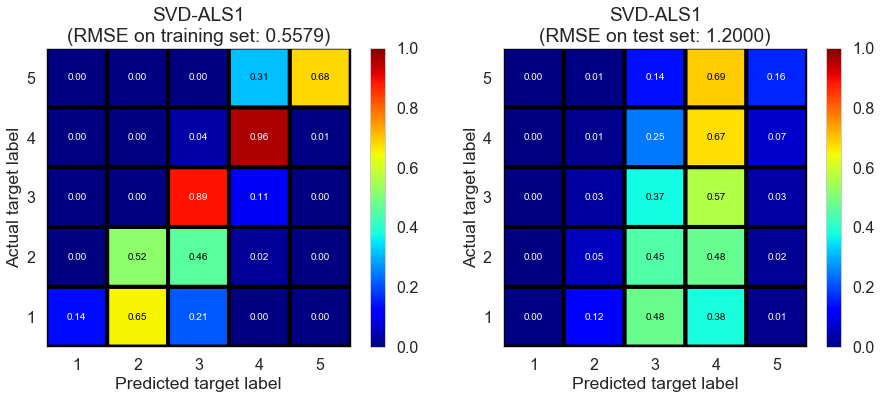


SVD-ALS2
Fitting time: 138.92994332313538 s.
RMSE on training set: 0.5597287839900046.
RMSE on test set: 1.2054049957473398.
r2 on training set: 0.8219530990405168.
r2 on test set: 0.17607725265455754.
Classification accuracy on training set: 0.7111554478070735.
Classification accuracy on test set: 0.2960694587023472.


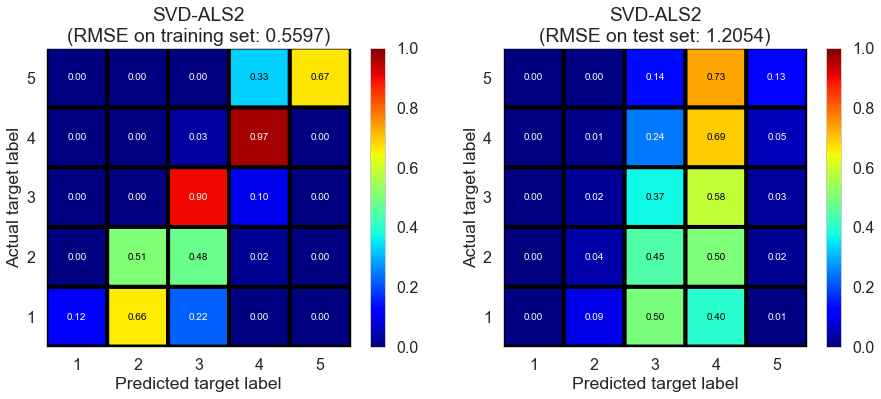


SVD-SGD*
Fitting time: 7.567363500595093 s.
RMSE on training set: 0.8266877948161494.
RMSE on test set: 1.2079084419552693.
r2 on training set: 0.6116152326294748.
r2 on test set: 0.17265136975389805.
Classification accuracy on training set: 0.4452783352086209.
Classification accuracy on test set: 0.3025768621787622.


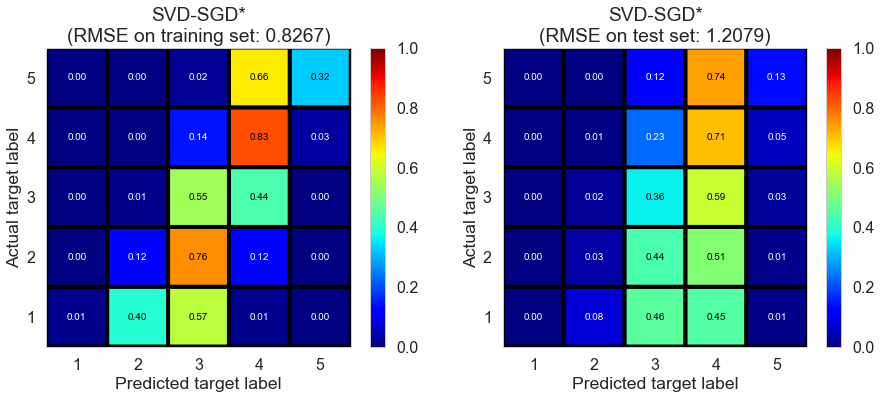


SVD++-SGD*
Fitting time: 40.137484550476074 s.
RMSE on training set: 0.87378187884168.
RMSE on test set: 1.2065155586433967.
r2 on training set: 0.5661044417968624.
r2 on test set: 0.17455836141461967.
Classification accuracy on training set: 0.4389448897446902.
Classification accuracy on test set: 0.3052215823082143.


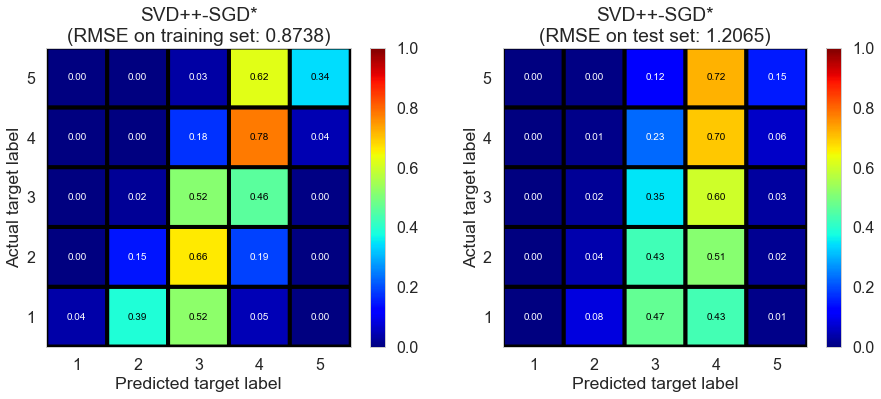


NMF-SGD*
Fitting time: 9.062758684158325 s.
RMSE on training set: 0.3665945380404326.
RMSE on test set: 1.3786339973719717.
r2 on training set: 0.923625018705818.
r2 on test set: -0.07775113112560361.
Classification accuracy on training set: 0.8656288786553608.
Classification accuracy on test set: 0.2905886242235485.


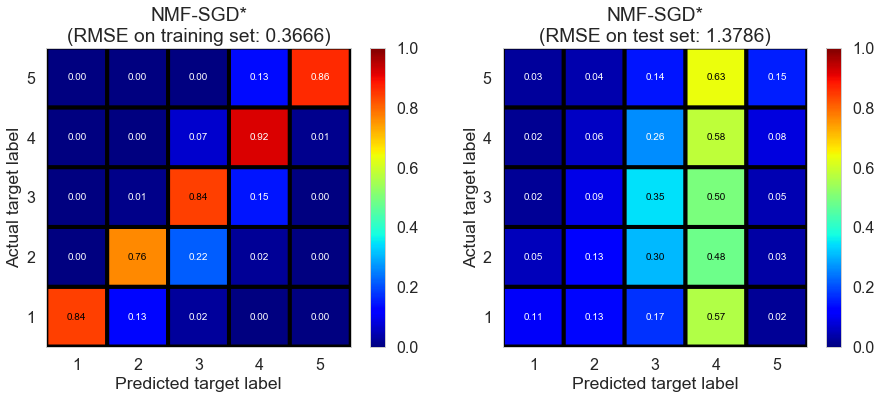


Slope one*
Fitting time: 1.899108648300171 s.
RMSE on training set: 0.3685495732591201.
RMSE on test set: 1.3895610395634592.
r2 on training set: 0.9228082366182286.
r2 on test set: -0.09490333084036018.
Classification accuracy on training set: 0.8578802677214676.
Classification accuracy on test set: 0.32220346945522244.


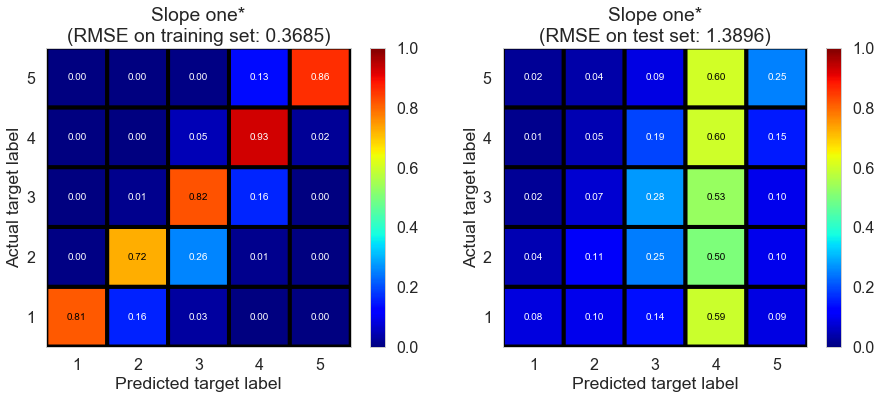


Co-clustering*
Fitting time: 7.640824317932129 s.
RMSE on training set: 0.7938199653387078.
RMSE on test set: 1.3364778755704894.
r2 on training set: 0.6418844559153782.
r2 on test set: -0.01284751434573228.
Classification accuracy on training set: 0.588418842580241.
Classification accuracy on test set: 0.3417778783080751.


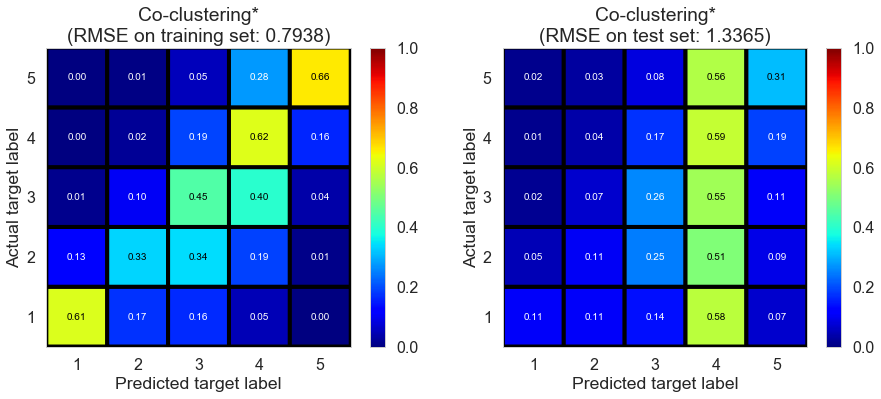


Wall time: 1min 26s


In [8]:
%%time

estimators = IO(data_dir + 'results/estimators.pkl').read_pickle()
is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()

for i in range(len(estimators)):
    if is_successful[i]:
        print_results(estimators[i], model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                      figname=fignames[i])

del estimators